To run this example locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/install.html) and execute: `ploomber examples -n cookbook/nested-cv`

To start a free, hosted JupyterLab: [![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fcookbook/nested-cv%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=cookbook/nested-cv%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)


# Nested cross-validation

<!-- start description -->
Nested cross-validation for model selection and hyperparameter tuning.
<!-- end description -->

More details in our [blog.](https://ploomber.io/blog/nested-cv/)

```yaml
# Content of pipeline.yaml
executor: parallel

tasks:
  - source: tasks/load.py
    product:
      nb: products/load.html
      data: products/data.csv

  - source: tasks/fit.py
    name: fit-
    product:
      nb: products/fit.html
      model: products/model.pkl
    grid:
      - model: sklearn.ensemble.RandomForestClassifier
        model_params:
          # optimize over these parameters
          - n_estimators: [2, 5]
            criterion: [gini, entropy]
    
      - model: sklearn.svm.SVC
        model_params:
          # optimize over these parameters
          - kernel: [linear, poly]
            C: [0.1, 1.0]
      
      

```

Plot:

In [1]:
%%sh
# run this in a terminal
ploomber plot

Loading pipeline...
Plot saved at: pipeline.png


100%|██████████| 3/3 [00:00<00:00, 2749.16it/s]


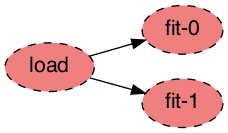

In [2]:
# run this in a python session
from IPython.display import Image
Image('pipeline.png')

Run the pipeline:

In [3]:
%%sh
# run this in a terminal
ploomber build

Loading pipeline...
Finished tasks so far: 
Remaining tasks: {'load', 'fit-1', 'fit-0'}
Finished 0 out of 3 tasks
Finished tasks so far: 
Remaining tasks: {'load', 'fit-1', 'fit-0'}
Finished 0 out of 3 tasks
Finished tasks so far: 
Remaining tasks: {'load', 'fit-1', 'fit-0'}
Finished 0 out of 3 tasks
Finished tasks so far: 
Remaining tasks: {'load', 'fit-1', 'fit-0'}
Finished 0 out of 3 tasks
Finished tasks so far: {'load'}
Remaining tasks: {'fit-0', 'fit-1'}
Finished 1 out of 3 tasks
Finished tasks so far: {'load'}
Remaining tasks: {'fit-0', 'fit-1'}
Finished 1 out of 3 tasks
Finished tasks so far: {'load', 'fit-1'}
Remaining tasks: {'fit-0'}
Finished 2 out of 3 tasks
Finished tasks so far: {'load', 'fit-1'}
Remaining tasks: {'fit-0'}
Finished 2 out of 3 tasks
name    Ran?      Elapsed (s)    Percentage
------  ------  -------------  ------------
load    True          5.87465       30.7249
fit-1   True          6.61557       34.6
fit-0   True          6.62994       34.6751


/Users/Edu/miniconda3/envs/projects/lib/python3.9/site-packages/ploomber/cli/cloud.py:164: UserWarning: Issue: No Valid API_Key
  warnings.warn(content)
Executing: 100%|██████████| 14/14 [00:05<00:00,  2.57cell/s]
/Users/Edu/miniconda3/envs/projects/lib/python3.9/site-packages/ploomber/cli/cloud.py:164: UserWarning: Issue: No Valid API_Key
  warnings.warn(content)
